Prasiddha Jung K.C.
Intern at The Sparks Foundation
Data Science and Business Analytics

Task 2
Prediction using Unsupervised ML
""Using the K-means clustering algorithm""
- from the given iris dataset, predict the optimum number of clusters and represent it virtually.

Steps:
Load the Iris dataset.
Determine the optimum number of clusters using the Elbow Method.
Apply K-means clustering with the determined number of clusters.
Visualize the clusters.

In [9]:
# importing the libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
df = pd.read_csv('/content/Iris.csv')

# display the first few rows of the DataFrame to confirm if it's loaded correctly.
print(df.head())


   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


Determine the Optimum Number of Clusters using the Elbow Method.

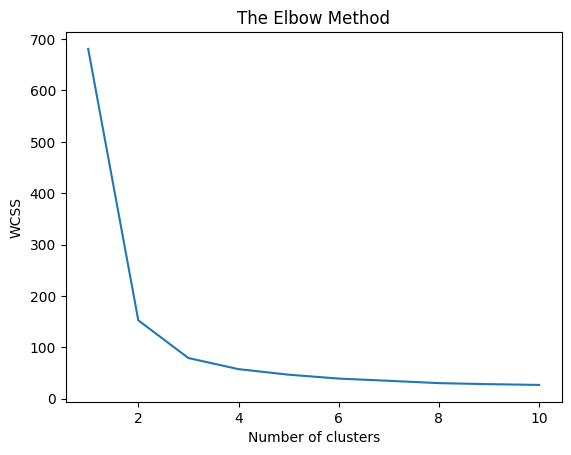

In [12]:
# Preparing the data
x= df.iloc[:, [1, 2, 3, 4]].values #assuming the last column is the target/species which we ignore for clustering

# Determine the optimum number of clusters using the Elbow method
wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init= 10, random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

#Plotting the results into a line graph to observe the elbow
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method') # allowing us to observe the elbow
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

In [15]:
# From the elbow plot, let's assume the optimum number of clusters is 3
# Applying k-means to the dataset
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(x)

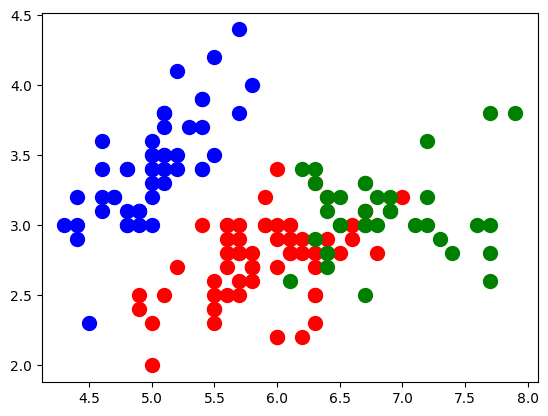

In [17]:
# Visualizing the clusters on the first two columns of the dataset
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Iris-virginica')

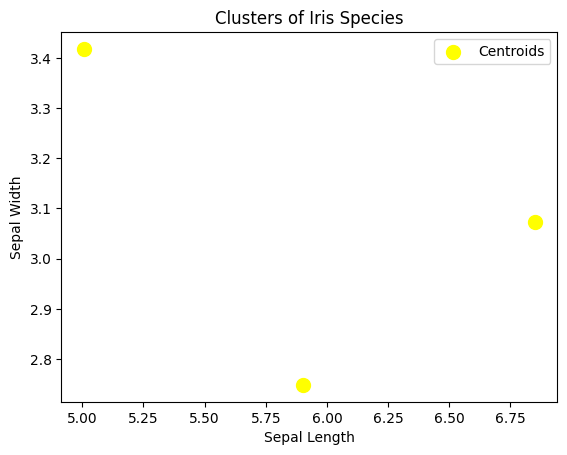

In [18]:
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')

plt.title('Clusters of Iris Species')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()